In [367]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go


In [368]:
pd.options.display.max_columns = 30
pd.options.display.max_rows = 30

### Data Cleaning for Product
product = pd.read_csv(r'Data/6980 products.csv', sep=',', header=0)
product['Profit'] =   0.6*product['Calculated Price'] - product['Cost Price']
product['Discount'] = product['Retail Price'] - product['Calculated Price']
product = product[['Product ID','Product Type','Cost Price','Retail Price',
                   'Calculated Price',
                   'Profit','Discount','Name','Brand','Product Condition']]
product = product[product['Cost Price'] !=(0)]
condition = product[product['Discount'] <0].index
product.drop(condition, inplace= True)
product

,Product ID,Product Type,Cost Price,Retail Price,Calculated Price,Profit,Discount,Name,Brand,Product Condition
0,29,P,38.00,150.00,135.00,43.000,15.00,Austin Custom Brass TA1 Trent Austin Signature Mouthpiece,Austin Custom Brass,New
1,37,P,129.00,239.99,219.99,2.994,20.00,Torpedo Bag Classic Case,Torpedo,New
2,39,P,3.48,6.95,5.95,0.090,1.00,Ultra Pure Valve Oil,Ultra-Pure,New
4,41,P,1.99,3.50,2.99,-0.196,0.51,Ultra Pure Tuning Slide Lube,Ultra-Pure,New
5,42,P,2.98,7.95,6.50,0.920,1.45,Ultra Pure Extra Large Microfiber Polishing Cloth,Ultra-Pure,New
...,...,...,...,...,...,...,...,...,...,...
1212,3471,P,229.84,899.99,684.99,181.154,215.00,As seen on TikTok with TrumpetMan Jay Webb: the Doubler's Flugelhorn!,Austin Custom Brass,New
1220,3481,P,2580.00,3570.00,3430.00,-522.000,140.00,Custom Adams A9 Trumpet in Medium Bore in Satin Gold lacquer with Red Brass Bell!,Adams,New
1223,3484,P,1400.00,2699.99,2149.99,-110.006,550.00,From Trent's collection check out Great playing barely used Yamaha Bobby Shew 2 YTR-8310ZII Tru...,Yamaha,New
1224,3485,P,1100.00,2249.99,1485.00,-209.000,764.99,Demo Austin Custom Brass Doubler's Euphonium!,Austin Custom Brass,New


In [369]:
### Data Cleaning for Customer
customer = pd.read_csv('Data/customer_anonymous.csv', sep=',', header=0)
subtitle = '|'.join(['Address First Name:','Address Last Name:','Address Company:',
                     'Address Line 1:','Address Line 2:','City/Suburb:',
                     'State Abbreviation:','Zip/Postcode:','Country:',
                     'Address Phone:'])
customer['Addresses'] = customer['Addresses'].str.replace(subtitle, '')
customer[['First Name', 'Last Name','Company','Address 1','Address 2',
          'City','State', 'Zipcode', 'Country','Phone']] = customer['Addresses'].str.split(pat=',', n=9, expand=True)
customer = customer.drop(customer.columns[[0,3,5,7,9,-1]], axis=1)
# Change Date to MM/DD/YY
customer['Date Joined'] = pd.to_datetime(customer['Date Joined'].astype(str),
                                         format='%d/%m/%Y')
customer['Date Joined'] = customer['Date Joined'].dt.strftime('%Y/%m/%d')
customer.head()

<ipython-input-369-7bca4d00616a>:7: FutureWarning:

The default value of regex will change from True to False in a future version.



,Customer ID,Company,Store Credit,Date Joined,Receive Review/Abandoned Cart Emails?,First Name,Last Name,Address 1,Address 2,City,State,Zipcode,Country
0,1,,0.0,2010/08/03,Y,Christian,Scott,201 St. Charles Avenue,Suite 114-472,New Orleans,LA,70170,United States
1,2,,0.0,2010/08/04,Y,Thomas,Marriott,552 NE 60th Street,,Seattle,,98115,United States
2,3,,0.0,2010/08/05,Y,jerry,cerchia,761 lake Susan hills drive,,chanhassen,MN,55317,United States
3,4,,0.0,2010/08/05,Y,Brent,Schumacher,30 White Bear Ave So,,Saint Paul,MN,55106,United States
4,5,UPS Customer Center,0.0,2010/08/06,Y,Kenneth,Knauer,1702 Mercer Road,,Lexington,KY,40511,United States


In [370]:
### Data Cleaning for Orders
order = pd.read_csv('Data/orders_anonymous.csv', sep=',', header=0)
order
order = order[['Order ID','Customer ID','Order Date','Order Status',
               'Date Shipped','Subtotal (inc tax)','Order Total (inc tax)',
               'Total Quantity','Shipping Phone','Payment Method',
               'Product Details','Coupon Details']]
# Change data format
order['Order Date'] = pd.to_datetime(order['Order Date'].astype(str),format='%d/%m/%Y')
order['Date Shipped'] = pd.to_datetime(order['Date Shipped'].astype(str),
                                       format='%d/%m/%Y')
order['Order Date'] = order['Order Date'].dt.strftime('%Y/%m/%d')
order['Date Shipped'] = order['Date Shipped'].dt.strftime('%Y/%m/%d')
# Separate orders into uncompleted and completed
remove = '|'.join(['Awaiting','Refunded','Cancelled'])
order['Order Status'] = order['Order Status'].astype(str)
completed_order = order[~order['Order Status'].str.contains(remove)]
uncompleted_order = order[order['Order Status'].str.contains(remove)]

# Mix all product details for Most profitable products
completed = completed_order['Product Details'].str.split(pat='|', expand = True)
completed = completed.stack().reset_index()
completed = completed[0]
completed = completed.str.split(pat=',', expand=True)
product_qty = completed.iloc[:,:2]
product_qty.iloc[:,0] = product_qty[0].str.strip('Product ID: ').astype(int)
product_qty.iloc[:,1] = product_qty[1].str.strip('Product Qty: ').astype(int)
product_qty = product_qty.rename(columns={0:'Product ID', 1: 'Qty'})

# Summary of product sale in past 10 years
k = product_qty.groupby(by=['Product ID']).sum().reset_index()
k = k.sort_values(by=['Qty'], ascending=False)
k = k[k['Product ID'] != 0]
k['Product ID'] = k['Product ID'].astype(str)


e:\pythonproject\aly\venv\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning:

Columns (1,7) have mixed types.Specify dtype option on import or set low_memory=False.

e:\pythonproject\aly\venv\lib\site-packages\pandas\core\indexing.py:1843: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

e:\pythonproject\aly\venv\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [371]:
# Find the most profitable Products
product_pro = product[['Product ID','Profit','Name','Cost Price',
                       'Retail Price','Calculated Price','Discount']]
k['Product ID'] = k['Product ID'].astype(int)
product1 = pd.merge(product_pro,k, on='Product ID')
product1['Product ID'] =  product1['Product ID'].astype(str)
product1['Total Profit'] = product1['Profit'] * product1['Qty']
product1 = product1.sort_values(by=['Total Profit'], ascending=False)



In [372]:
completed_order_1 = completed_order.drop(['Product Details','Coupon Details',
                                          'Shipping Phone'], axis=1)
completed_order_1['Customer ID'] = completed_order_1['Customer ID'].astype(str)
df = completed_order['Product Details'].str.split(pat='|', expand = True)
df = df.stack().reset_index(level=1, drop=True)
df.name = 'Products'
df_new = completed_order_1.join(df)


In [373]:
#### further split
df1 = df_new['Products'].str.split(pat=',', expand = True)
df1 = df1.iloc[:,np.r_[0:4, 6]]
df1.iloc[:,0] = df1[0].str.strip('Product ID: ').astype(str)
df1.iloc[:,1] = df1[1].str.strip('Product Qty: ').astype(int)
df1.iloc[:,2] = df1[2].str.strip('Product SKU: ').astype(str)
df1.iloc[:,3] = df1[3].str.strip('Product Name: ').astype(str)
df1.iloc[:,4] = df1[6].str.strip('Product Unit Price: ').astype(str)
df1 = df1.rename(columns={0:'Product ID', 1: 'Product Qty', 2: 'Product SKU',
                          3:'Product Name', 6: 'Unit Price'})

# completed order + products
df_new1 = completed_order_1.join(df1)

In [374]:
# completed order + products + customer = all in one dataset
customer['Customer ID'] = customer['Customer ID'].astype(str)
df_new1['Customer ID']  = df_new1['Customer ID'].astype(str)
df_c = pd.merge(df_new1,customer, on=['Customer ID'])

df_c = df_c.rename(columns={'City':'city'})
df_c = df_c[~pd.isnull(df_c['city'])]
df_c = df_c[df_c['city'].notnull()]
df_c = df_c.drop(df_c[df_c['city'] == ' '].index)
df_c = df_c[df_c['Product ID'] != '0']

In [375]:
# add price info to the df_c
all_one = pd.merge(df_c, product1, on=['Product ID'])
df_all = all_one[['Customer ID','Product ID','Name','Order Date','Cost Price',
                   'Retail Price','Calculated Price','Discount','Product Qty',
                   'Profit','Total Profit','Country']]



In [376]:
freq1 = df_all[['Order Date','Product ID','Product Qty','Calculated Price','Cost Price','Profit','Customer ID']].sort_values(['Order Date'], ascending=True)
freq1['Order Date'] = pd.to_datetime(freq1['Order Date'])
freq1 = freq1.set_index('Order Date').reset_index()


In [377]:
start_date = input('Please input a start date (Format: YYYY-MM-DD)')
end_date = input('Please input a end date (Format: YYYY-MM-DD)')

interval = (freq1['Order Date'] > start_date) & (freq1['Order Date'] <= end_date)


df_fq = freq1[['Order Date','Product ID','Product Qty','Customer ID']].copy()
df_fq =df_fq.loc[interval]
freq2 = df_fq[['Order Date','Product ID','Product Qty']].copy()
freq3 = df_fq[['Order Date','Product ID','Product Qty','Customer ID']].copy()


In [378]:
# Sales count for day, month, quarter, and year.
y = freq2['Order Date'].dt.year
q = freq2['Order Date'].dt.quarter
m = freq2['Order Date'].dt.month

freq2['Count_d'] = freq2.groupby(['Order Date','Product ID'])['Product Qty'].transform('sum')
freq2['Count_m'] = freq2.groupby([y,m,'Product ID'])['Product Qty'].transform('sum')
freq2['Count_q'] = freq2.groupby([y,q,'Product ID'])['Product Qty'].transform('sum')
freq2['Count_y'] = freq2.groupby([y, 'Product ID'])['Product Qty'].transform('sum')

# define high repurchased rate products
w = freq2[['Product ID','Count_m']]
w = w.groupby(['Product ID'])['Count_m'].mean().quantile(0.9)
freq2['High repurchased'] = np.where((
    freq2['Count_m'] >= w)| (freq2['Count_q'] >= 3*w) | (freq2['Count_y'] >= 12*w), True,False)

# define high value products
h_value = freq1[['Order Date','Product ID','Calculated Price','Cost Price','Profit']].copy()
h_value = h_value.loc[interval]
h_value['Profit rate'] = h_value['Profit'] / h_value['Calculated Price']
h_value['High Value'] = np.where((h_value['Profit'] >= 0.25),True,False)



In [379]:
# get trending products
trending = freq2.join(h_value['High Value'])
col_list = ['Count_d','Count_m','Count_q','Count_y']
pc_list = ['pc_d','pc_m','pc_q','pc_y']
trending[pc_list] = trending[col_list].pct_change()
trending_y = trending[['Order Date','Product ID','pc_y']]
trending_y = trending_y.groupby(['Product ID',y]).mean()
trending_y = trending_y.sort_values(['pc_y','Order Date'],ascending=False)
trending_y1 = trending_y.unstack().reset_index()
trending_y1.columns = trending_y1.columns.droplevel()
trending_y1.columns.name = ''
trending_y1 = trending_y1.rename(columns={'':'Product ID'})
trending_y1['Avg'] = trending_y1.mean(axis=1)
top5 = trending_y1.sort_values(['Avg'],ascending=False)
top5 = top5.dropna().head(5)


In [380]:
pro_list = top5['Product ID'].values
product_name = df_all[df_all['Product ID'].isin(pro_list)][['Product ID','Name']].drop_duplicates(['Product ID'])
product_name['Product ID'] = product_name['Product ID'].astype('category').cat.set_categories(pro_list)
product_name = product_name.sort_values(by=['Product ID'], ascending=True)
product_name = product_name.to_string(index=False)


In [381]:
# lifetime value
lt_value = df_c[['Order Date','Customer ID','Order Total (inc tax)']].copy()
lt_value = lt_value.drop_duplicates()
lt_value['lifetime value'] = lt_value.groupby(['Customer ID'])['Order Total (inc tax)'].cumsum()

In [382]:
# customer loyalty
customer_lt = pd.read_csv('data/customer_loyalty.csv',sep=',',header=0)

From 2011-01-01 to 2015-05-05,
the trending products were:
Product ID                                                        Name
       144     Austin Custom Brass Standard Series Trumpet Mouthpieces
       150                 Austin Custom Brass Flugelhorn Mouthpieces 
       211                      Austin Custom Brass Trumpet Backbores 
       261 ACB Introductory Fabrication Model ACB 5 Trumpet Mouthpiece
        39                                       Ultra Pure Valve Oil 

Details of YOY changes:
   Product ID      2011      2012       2013       2014       2015        Avg
2         144  2.890351  7.579042  17.712682  16.298431  14.362117  11.768524
4         150  0.084854  3.739011   2.542209   3.667253   0.322002   2.071066
5         211  0.930375  2.135700   3.145552   2.475666   0.052995   1.748058
8         261  0.868590  1.123449   0.522655   1.695161  -0.389899   0.763991
27         39 -0.802676  0.245788   1.469300   1.058032   1.806165   0.755322




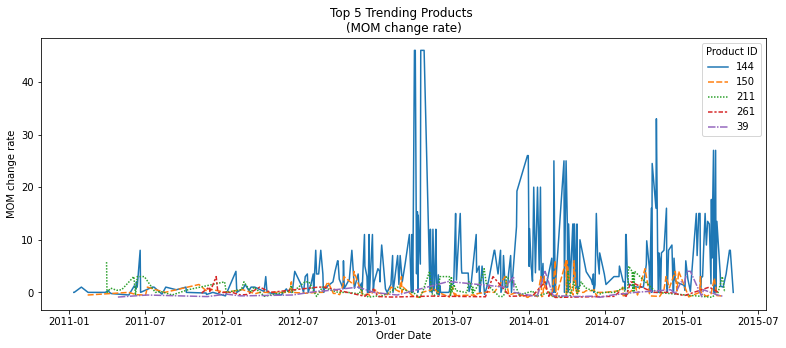

In [383]:
pd.options.display.max_colwidth = 100
date = f"{start_date} to {end_date}"
print(f'From {date},\n'
      f'the trending products were:\n{product_name}\n\n'
      f'Details of YOY changes:\n{top5}\n\n')

trending_m = trending[['Order Date','Product ID','pc_m']]
trending_m = trending_m[trending_m['Product ID'].isin(pro_list)]
trending_m = trending_m.pivot_table(index='Order Date', columns='Product ID', values='pc_m')

plt.figure(figsize=(13,5))
sns.lineplot(data=trending_m)
plt.ylabel('MOM change rate')
plt.title('Top 5 Trending Products \n(MOM change rate)')
plt.show()

trending_cm = trending[['Order Date','Product ID','Count_m','High Value','High repurchased']]
trending_cm = trending_cm[trending_cm['Product ID'].isin(pro_list)]
# trending_cm = trending_cm.pivot_table(index='Order Date', columns='Product ID', values='Count_m')

fig = px.line(trending_cm,x='Order Date', y="Count_m" , color="Product ID",
              line_group="Product ID", hover_name="Product ID",
              title="Top 5 Trending Product Sales Status",
              labels={"Count_m":"Sales"},
              width=800, height=450)

fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(font_family="Arial",
                  title_font_family="Arial")
fig.update_yaxes(title="Sales")
fig.show()

trending_hv = trending_cm[['Order Date','Product ID','High Value']].copy()
trending_hv['High Value'] = np.where((trending_hv['High Value'] == True), 1, -1)

trending_hr = trending_cm[['Order Date','Product ID','High repurchased']].copy()
trending_hr['High repurchased'] = np.where((trending_hr['High repurchased'] == True), 1, -1)

clrs =[[0,  '#0384fc'], #discrete colorscale to map 0 (False) to dark blue, and 1 (True) to red
       [1, '#fcba03']]

fig_hr = go.Figure(data=go.Heatmap(
        z=trending_hr['High repurchased'],
        x= trending_hr['Order Date'],
        y= trending_hr['Product ID'])
)
fig_hr.update_yaxes(type='category')
fig_hr.update_layout(title='High Repurchased Products Test Result',
                     xaxis_nticks=12,width=799, height=400,
                     coloraxis=dict(colorscale=clrs, showscale=True))
fig_hr.show()
fig_hv = go.Figure(data=go.Heatmap(
        z=trending_hv['High Value'],
        x= trending_hv['Order Date'],
        y= trending_hv['Product ID'])
)
fig_hv.update_yaxes(type='category')
fig_hv.update_layout(title='High Value Products Test Result',
                     xaxis_nticks=12,width=799, height=400,
                     coloraxis=dict(colorscale=clrs, showscale=True))
fig_hv.show()

In [384]:
# Potential Customer for trending products
potential_customer = freq3[freq3['Product ID'].isin(pro_list)][['Product ID','Customer ID','Product Qty']].drop_duplicates(['Product ID','Customer ID'])
potential_customer = potential_customer.groupby(['Product ID','Customer ID']).count()
potential_customer = pd.DataFrame(potential_customer).reset_index()
customer_lt['Customer ID'] = customer_lt['Customer ID'].astype(str)
chart = potential_customer.merge( customer_lt, how='inner', left_on=['Customer ID'],
                    right_on = ['Customer ID'])
chart = chart[['Product ID','Customer ID','loyalty','lifetime','spend per order','group2 number']]
chart = chart.groupby(['Product ID','Customer ID'])['loyalty'].sum()
chart = chart.groupby('Product ID').nlargest(5).reset_index(level=0, drop=True)
chart = pd.DataFrame(chart)
print(f'Potential Customers ID may interest in these products: \n\n\n{chart} ')


Potential Customers ID may interest in these products: 


                            loyalty
Product ID Customer ID             
144        932          2944.500000
           2230         2453.000000
           2007         2316.675000
           2336         2033.000000
           895          2033.000000
150        810          2901.343000
           2419         1893.000000
           2249         1345.200000
           851          1252.500000
           2236         1137.217000
211        1909          830.011125
           567           780.375000
           563           522.255219
           902           497.982102
           919           473.760889
261        894          1413.451000
           545          1318.300000
           564           646.347000
           1462          563.000000
           544           411.600000
39         2007         2316.675000
           894          1413.451000
           2186          744.251000
           992           577.860000
      

In [385]:
chart1 = chart.reset_index()
fig = px.bar(chart1, x='Product ID', y='loyalty',
                 hover_data=['loyalty', 'Customer ID'], color='loyalty', height=400)
fig.update_xaxes(type='category', tickangle=45)
fig.show()



